# Explorer

## 1. Create virtual environment

In [3]:
# virtualenv venv 
# source venv/bin/activate (Linux/Mac) or venv\Scripts\activate (Windows)

## 2. Install Ultralytics

In [ ]:
# pip install -r requirements.txt

## 3. Deploy the model
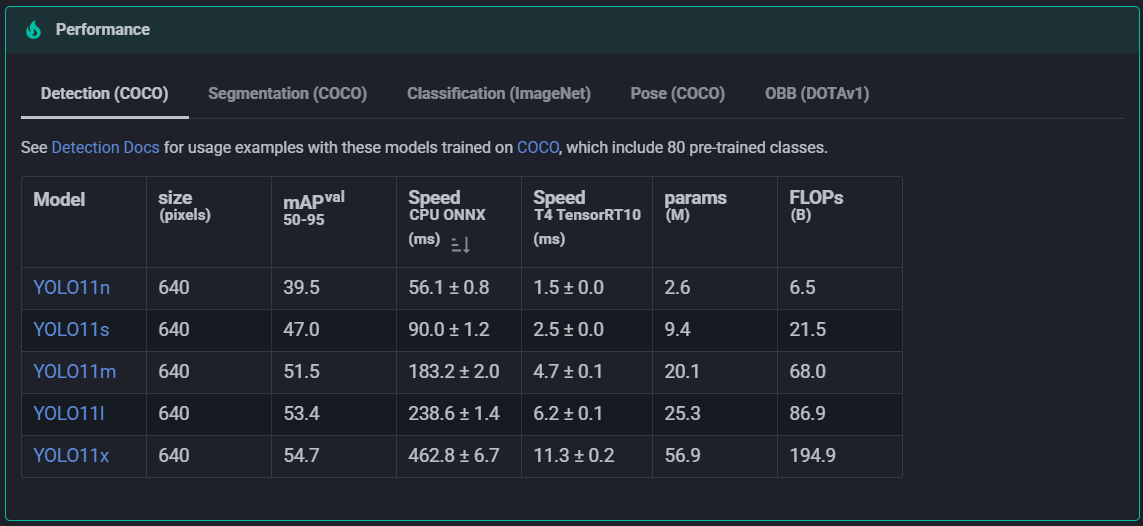
[Ultralytics page](https://docs.ultralytics.com/models/yolo11/#detection-coco)

In [ ]:
# Importamos las librerías necesarias
import cv2  # Librería para trabajar con imágenes y video en tiempo real
import math  # Librería matemática para realizar cálculos
import ultralytics  # Librería para trabajar con modelos YOLO (detección de objetos)

# Cargamos el modelo YOLO preentrenado desde el archivo "yolo11x.pt"
model = ultralytics.YOLO("yolo11x.pt")

# Iniciamos la captura de video desde la cámara (índice 0 para la cámara predeterminada)
cap = cv2.VideoCapture(0)

# Configuramos las propiedades del texto que se mostrará en la imagen
font = cv2.FONT_HERSHEY_SIMPLEX  # Tipo de fuente
fontScale = 0.7  # Escala del texto
color = (0, 250, 0)  # Color del texto (verde en formato BGR)
thickness = 2  # Grosor del texto

# Iniciamos un bucle infinito para procesar el video en tiempo real
while True:
    # Leemos un frame de la cámara
    success, img = cap.read()

    # Pasamos el frame al modelo YOLO para realizar la detección de objetos
    results = model(img, stream=True)

    # Iteramos sobre los resultados obtenidos por el modelo
    for r in results:
        # Iteramos sobre cada caja detectada en el frame
        for box in r.boxes:
            # Obtenemos las coordenadas de la caja delimitadora (bounding box)
            x1, y1, x2, y2 = box.xyxy[0]
            # Convertimos las coordenadas a enteros
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Calculamos la confianza de la detección (en porcentaje)
            confidence = math.ceil((box.conf[0] * 100))

            # Dibujamos la caja delimitadora en el frame
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)
            # Mostramos el nombre de la clase detectada y la confianza sobre la caja
            cv2.putText(img, r.names[int(box.cls[0])] + " " + str(confidence) + "%", 
                        [x1 + 4, y1 + 25], font, fontScale, color, thickness)

    # Mostramos el frame procesado en una ventana llamada "Webcam"
    cv2.imshow('Webcam', img)

    # Si el usuario presiona la tecla 'q', salimos del bucle
    if cv2.waitKey(1) == ord('q'):
        break

# Liberamos la cámara y cerramos todas las ventanas abiertas
cap.release()
cv2.destroyAllWindows()